## 4 Clustering {-}

### 4.1 {-}

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplc

Text(0, 0.5, 'Spending_Score')

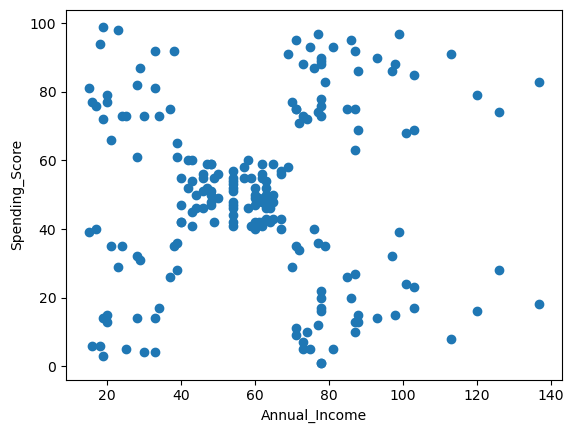

In [249]:
mall_df = pd.read_csv('mall_customers.csv')
mall_df = mall_df.to_numpy()
#print(mall_df)
plt.scatter(mall_df[:, 0], mall_df[:, 1])
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')

### 4.2 {-}

In [250]:
def k_means(k, d):
    # add cluster assignment column
    ca = np.zeros(d.shape[0])[:, None]
    d = np.hstack((d, ca))


    # randomize cluster centers
    x = np.random.uniform(d[:, 0].min(), d[:, 0].max(), (k,))
    y = np.random.uniform(d[:, 1].min(), d[:, 1].max(), (k,))
    

    i = 0
    dif_tot = 1
    # iterrate until no changes to cluster centers
    while dif_tot > 0 or i == 0: 

        # assign clusters
        for j in range(d.shape[0]):
            min_dist = None
            cl_lbl = None
            for k in range(x.shape[0]):
                dist = euclidian_dist(np.array([d[j,0],d[j,1]]), np.array([x[k], y[k]]))
                if not min_dist:
                    min_dist = dist 
                    cl_lbl = k 
                if (min_dist > dist):
                    min_dist = dist 
                    cl_lbl = k 
            d[j, 2] = cl_lbl

        # adjust cluster centers
        dif_tot = 0
        for h in range(x.shape[0]):
            prev_x = x[h]
            prev_y = y[h]
            x[h] = np.mean(d[d[:,2] == h][:,0])
            y[h] = np.mean(d[d[:,2] == h][:,1])
            dif_tot += abs(prev_x - x[h]) + abs(prev_y - y[h])
            
        i += 1
    return x, y, d

        
            

def dist_sum(d,x,y):
    # calc total distance from each point to its center
    tot_dist = 0
    for j in range(d.shape[0]):
        k = int(d[j,2])
        tot_dist += euclidian_dist(np.array([d[j,0],d[j,1]]), np.array([x[k], y[k]]))
    return tot_dist


def iter_kmeans(k,d):
    # run 10 iterrations of k means
    # get centers that minimize distance from points
    tot_dist = None
    best_x = None
    best_y = None
    best_d = None
    for _ in range(10):
        x,y,d = k_means(k,d)

        curr_tot_dist = dist_sum(d,x,y) # calc sum of all distances to centers
        
        # if new smallest distance replace values
        if not tot_dist:
            best_x = x
            best_y = y
            best_d = d
            tot_dist = curr_tot_dist
        elif curr_tot_dist < tot_dist:
            best_x = x
            best_y = y
            best_d = d
            tot_dist = curr_tot_dist


    # plot clusters and centers of best cluster
    labels = best_d[:,2]
    colors = ['salmon','lightgreen','lightblue','lightgrey', 'wheat']
    plt.scatter(best_d[:, 0], best_d[:, 1], c=labels, cmap=mplc.ListedColormap(colors))

    label = [0,1,2,3,4]
    colors = ['firebrick','darkgreen','darkblue','grey', 'darkorange']
    plt.scatter(best_x, best_y, c=label, cmap=mplc.ListedColormap(colors))
    plt.xlabel('Annual_Income')
    plt.ylabel('Spending_Score')
    plt.show()

    centers = np.array([best_x, best_y]).T
    return labels, centers, tot_dist
        



def euclidian_dist(a,b):
    # calc euclidian distance
    return np.linalg.norm(a - b)




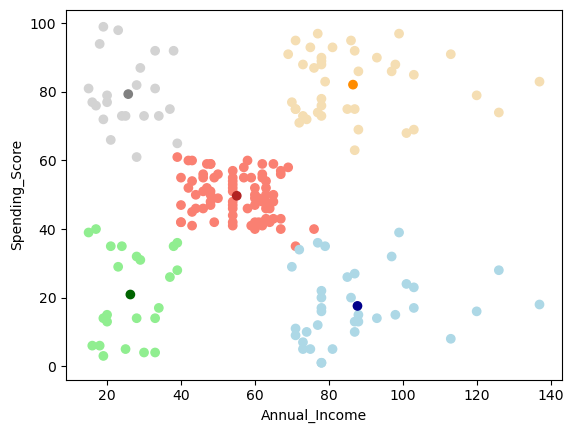

Labels
[1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3.
 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 3. 1. 0. 1. 3. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 4. 2. 4. 0. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 0. 4.
 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4.
 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4. 2. 4.
 2. 4. 2. 4. 2. 4. 2. 4.]
centers
[[55.0875     49.7125    ]
 [26.30434783 20.91304348]
 [87.75       17.58333333]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]
total distance to centers metric 2602.9725788386436


In [251]:
k = 5 # num clusters
d = mall_df # provide data
labels, centers, tot_dist = iter_kmeans(k, d)
print('Labels')
print(labels)
print('centers')
print(centers)
print('total distance to centers metric', tot_dist)





### 4.3 {-}

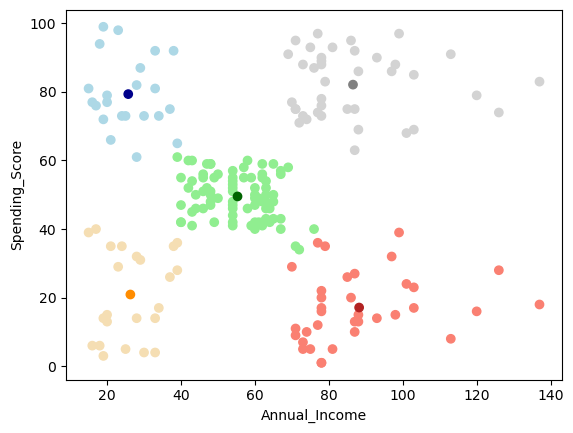

Labels
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]
centers
[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]
total distance to centers metric 2604.025270158349


In [252]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k).fit(mall_df)
x, y = kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

labels = kmeans.labels_
colors = ['salmon','lightgreen','lightblue','lightgrey', 'wheat']
plt.scatter(mall_df[:, 0], mall_df[:, 1], c=labels, cmap=mplc.ListedColormap(colors))


label = [0,1,2,3,4]
colors = ['firebrick','darkgreen','darkblue','grey', 'darkorange']
plt.scatter(x, y, c=label, cmap=mplc.ListedColormap(colors))
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

centers = np.array([x, y]).T
print('Labels')
print(labels)
print('centers')
print(centers)

d = mall_df
labels = labels[:, None]
d = np.hstack((d, labels))
print('total distance to centers metric', dist_sum(d,x,y))





### 4.4 {-}

In [253]:
def k_median(k, d):
    # add cluster assignment column
    ca = np.zeros(d.shape[0])[:, None]
    d = np.hstack((d, ca))

    # randomize cluster centers
    x = np.random.uniform(d[:, 0].min(), d[:, 0].max(), (k,))
    y = np.random.uniform(d[:, 1].min(), d[:, 1].max(), (k,))

    i = 0
    dif_tot = 1
    # iterrate until no changes to cluster centers
    while (dif_tot > 0 or i == 0) and i < 300: 
        
        # assign clusters
        for j in range(d.shape[0]):
            min_dist = None
            cl_lbl = None
            for k in range(x.shape[0]):
                dist = l1_dist(np.array([d[j,0],d[j,1]]), np.array([x[k], y[k]]))
                if not min_dist:
                    min_dist = dist 
                    cl_lbl = k 
                if (min_dist > dist):
                    min_dist = dist 
                    cl_lbl = k 
            d[j, 2] = cl_lbl

        dif_tot = 0
        # adjust cluster centers
        for h in range(x.shape[0]):
            prev_x = x[h]
            prev_y = y[h]
            x[h] = np.median(d[d[:,2] == h][:,0])
            y[h] = np.median(d[d[:,2] == h][:,1])
        
        dif_tot += abs(prev_x - x[h]) + abs(prev_y - y[h])
        i += 1
        
    return x, y, d



def l1_dist(a,b):
    dif = a - b
    sum = 0
    for d in dif:
        sum += abs(d)
    return sum



def iter_kmedian(k,d):
    # run 10 iterrations of k medians
    # get centers that minimize distance from points
    tot_dist = None
    best_x = None
    best_y = None
    best_d = None
    for _ in range(10):
        x,y,d = k_median(k,d)

        curr_tot_dist = dist_sum(d,x,y) # calc sum of all distances to centers
        
        # if new smallest distance replace values
        if not tot_dist:
            best_x = x
            best_y = y
            best_d = d
            tot_dist = curr_tot_dist
        elif curr_tot_dist < tot_dist:
            best_x = x
            best_y = y
            best_d = d
            tot_dist = curr_tot_dist
    
    labels = best_d[:,2]
    colors = ['salmon','lightgreen','lightblue','lightgrey', 'wheat']
    plt.scatter(best_d[:, 0], best_d[:, 1], c=labels, cmap=mplc.ListedColormap(colors))

    label = [0,1,2,3,4]
    colors = ['firebrick','darkgreen','darkblue','grey', 'darkorange']
    plt.scatter(best_x, best_y, c=label, cmap=mplc.ListedColormap(colors))
    plt.xlabel('Annual_Income')
    plt.ylabel('Spending_Score')
    plt.show()

    centers = np.array([best_x, best_y]).T
    return labels, centers, tot_dist




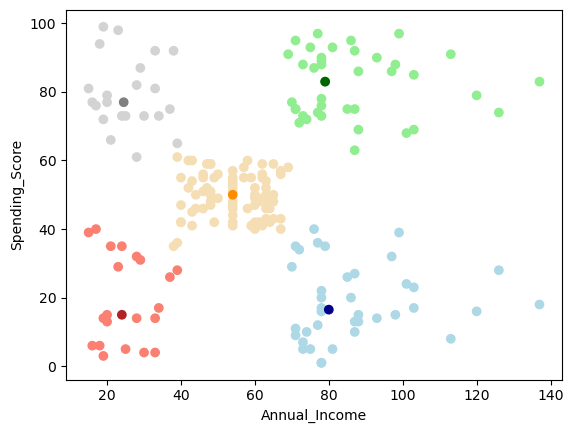

Labels
[0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3.
 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 0. 3. 4. 3. 4. 4. 0. 3. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1.
 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1.
 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1.
 2. 1. 2. 1. 2. 1. 2. 1.]
centers
[[24.  15. ]
 [79.  83. ]
 [80.  16.5]
 [24.5 77. ]
 [54.  50. ]]
total distance to centers metric 2606.6613999526207


In [254]:
k = 5
d = mall_df
labels, centers, tot_dist = iter_kmedian(k, d)
print('Labels')
print(labels)
print('centers')
print(centers)
print('total distance to centers metric', tot_dist)